/var/folders/tf/qxc6fvcj1cs804t6nk1kq60m0000gn/T/ipykernel_73882/4067395611.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_bug_counts = data.resample('M')['buggy'].value_counts().unstack(fill_value=0)
/var/folders/tf/qxc6fvcj1cs804t6nk1kq60m0000gn/T/ipykernel_73882/4067395611.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_bug_counts = data.resample('M')['buggy'].value_counts().unstack(fill_value=0)
/var/folders/tf/qxc6fvcj1cs804t6nk1kq60m0000gn/T/ipykernel_73882/4067395611.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_bug_counts = data.resample('M')['buggy'].value_counts().unstack(fill_value=0)
/var/folders/tf/qxc6fvcj1cs804t6nk1kq60m0000gn/T/ipykernel_73882/4067395611.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthl

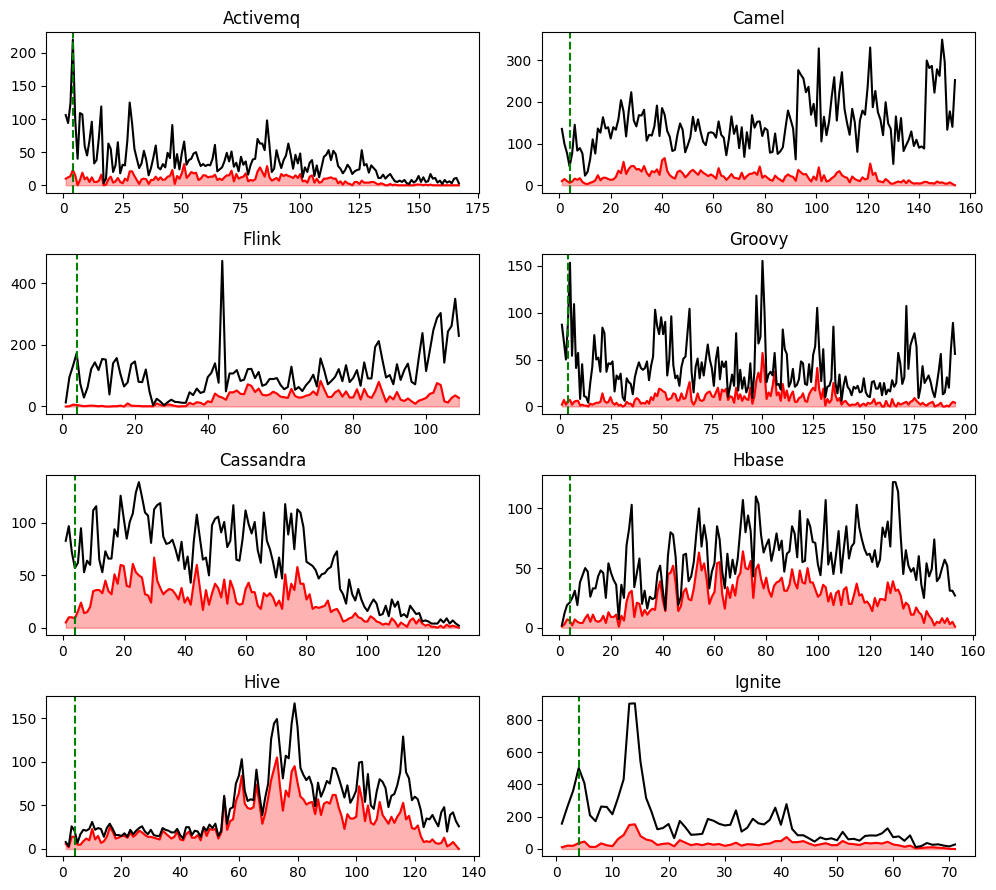

In [95]:
import pandas as pd
from pathlib import Path
from environment import PROJECTS

import matplotlib.pyplot as plt
import seaborn as sns

# 모든 프로젝트 데이터를 저장할 리스트
all_projects_data = []

for project in PROJECTS:
    # data = pd.read_csv(f"../data/dataset/filtered/{project}.csv")
    data = pd.read_csv("/Users/juhansae/Downloads/apachejit/dataset/apachejit_total.csv")
    data = data.loc[data["project"] == f"apache/{project}"]

    # from timestamp to datetime
    data["date"] = pd.to_datetime(data["author_date"], unit='s')

        
    # data["date"] = pd.to_datetime(data["author_date"].dt.date)

    # assert len(data[~data['date'].isnull()]) == len(data)
    # data["date"] = pd.to_datetime(data["date"])
    data = data.set_index(["date"])
    data = data.sort_index()

    # data = data.loc[data["project"] == project]

    monthly_bug_counts = data.resample('M')['buggy'].value_counts().unstack(fill_value=0)
    monthly_bug_counts['total'] = monthly_bug_counts[False] + monthly_bug_counts[True]
    monthly_bug_counts['project'] = project  # 프로젝트 이름 추가
    monthly_bug_counts['month_number'] = range(1, len(monthly_bug_counts) + 1)


    all_projects_data.append(monthly_bug_counts)

# 서브플롯을 만들기 위해 행과 열의 개수 계산
num_projects = len(PROJECTS)
cols = 2
rows = (num_projects + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(10, 9))

for i, (project, ax) in enumerate(zip(PROJECTS, axes.flatten())):
    project_data = all_projects_data[i]
    
    ax.plot(project_data['month_number'], project_data[True], color='red')
    ax.fill_between(project_data['month_number'], project_data[True], color='red', alpha=0.3)
    ax.plot(project_data['month_number'], project_data['total'], color='black')
    ax.axvline(x=4, color='green', linestyle='--')
    ax.set_title(project.capitalize())
    # ax.set_xlabel('Month Number')
    # ax.set_ylabel('Count')

# 남는 서브플롯이 있으면 제거
if num_projects % cols != 0:
    for j in range(num_projects, rows * cols):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.savefig("../rebuttal/plots/distribution_origin.png")


/var/folders/tf/qxc6fvcj1cs804t6nk1kq60m0000gn/T/ipykernel_73882/3858170550.py:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_bug_counts = data.resample('M')['buggy'].value_counts().unstack(fill_value=0)
/var/folders/tf/qxc6fvcj1cs804t6nk1kq60m0000gn/T/ipykernel_73882/3858170550.py:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_bug_counts = data.resample('M')['buggy'].value_counts().unstack(fill_value=0)
/var/folders/tf/qxc6fvcj1cs804t6nk1kq60m0000gn/T/ipykernel_73882/3858170550.py:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_bug_counts = data.resample('M')['buggy'].value_counts().unstack(fill_value=0)
/var/folders/tf/qxc6fvcj1cs804t6nk1kq60m0000gn/T/ipykernel_73882/3858170550.py:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthl

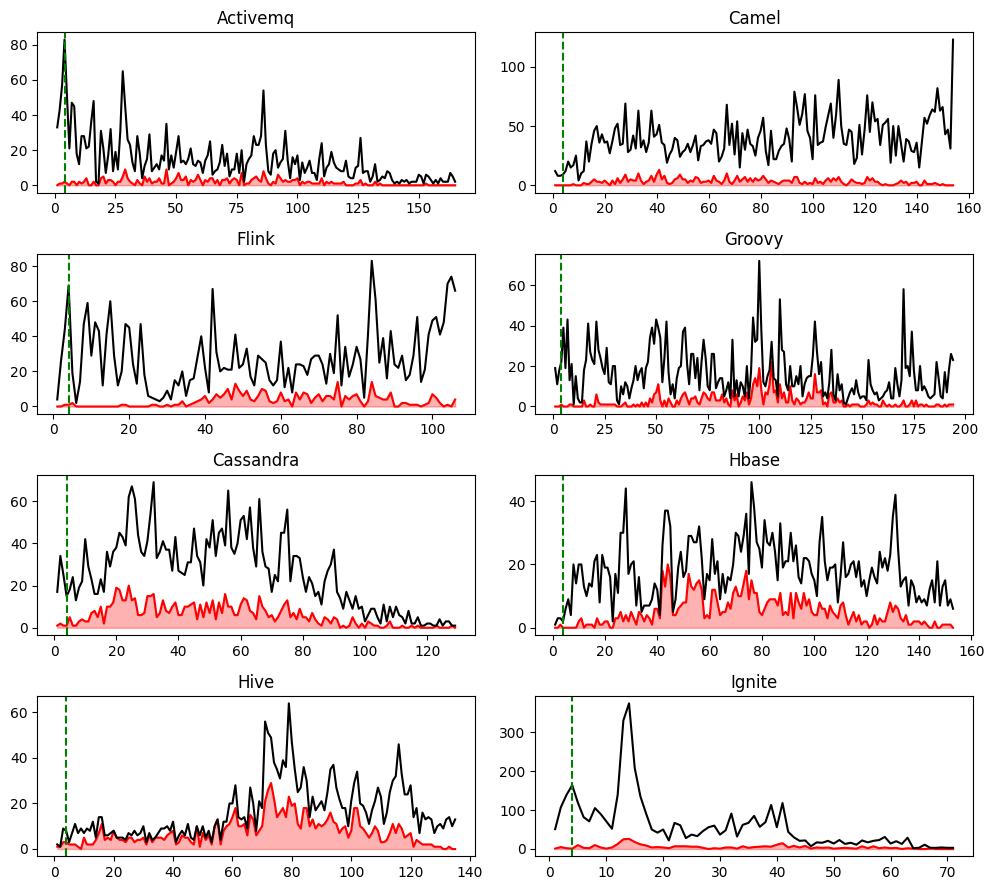

In [96]:
import pandas as pd
from pathlib import Path
from environment import PROJECTS

import matplotlib.pyplot as plt
import seaborn as sns

# 모든 프로젝트 데이터를 저장할 리스트
all_projects_data = []

for project in PROJECTS:
    data = pd.read_csv(f"../data/dataset/filtered/{project}.csv")
    # data = pd.read_csv("/Users/juhansae/Downloads/apachejit/dataset/apachejit_total.csv")
    # data = data.loc[data["project"] == f"apache/{project}"]

    # from timestamp to datetime
    # data["date"] = pd.to_datetime(data["author_date"], unit='s')

    data = data.loc[data["project"] == project]
        
    # data["date"] = pd.to_datetime(data["author_date"].dt.date)

    # assert len(data[~data['date'].isnull()]) == len(data)
    data["date"] = pd.to_datetime(data["date"])
    data = data.set_index(["date"])
    data = data.sort_index()

    # data = data.loc[data["project"] == project]

    monthly_bug_counts = data.resample('M')['buggy'].value_counts().unstack(fill_value=0)
    monthly_bug_counts['total'] = monthly_bug_counts[False] + monthly_bug_counts[True]
    monthly_bug_counts['project'] = project  # 프로젝트 이름 추가
    monthly_bug_counts['month_number'] = range(1, len(monthly_bug_counts) + 1)


    all_projects_data.append(monthly_bug_counts)

# 서브플롯을 만들기 위해 행과 열의 개수 계산
num_projects = len(PROJECTS)
cols = 2
rows = (num_projects + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(10, 9))

for i, (project, ax) in enumerate(zip(PROJECTS, axes.flatten())):
    project_data = all_projects_data[i]
    
    ax.plot(project_data['month_number'], project_data[True], color='red')
    ax.fill_between(project_data['month_number'], project_data[True], color='red', alpha=0.3)
    ax.plot(project_data['month_number'], project_data['total'], color='black')
    ax.axvline(x=4, color='green', linestyle='--')
    ax.set_title(project.capitalize())
    # ax.set_xlabel('Month Number')
    # ax.set_ylabel('Count')

# 남는 서브플롯이 있으면 제거
if num_projects % cols != 0:
    for j in range(num_projects, rows * cols):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.savefig("../rebuttal/plots/distribution.png")
